Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Dataset Preview:
    student_id  avg_quiz_score  attendance_pct  num_assignments_submitted  \
0           1             7.5              90                          6   
1           2             4.0              55                          3   
2           3             6.2              75                          4   
3           4             5.0              65                          3   
4           5             3.2              40                          2   

   lms_interactions  performance_label  
0                35                  2  
1                15                  0  
2                22                  1  
3                20                  1  
4                10                  0  

🧹 Missing Values:
 student_id                   0
avg_quiz_score               0
attendance_pct               0
num_assignments_submitted    0
lms_interactions             0
performance_label            0
dtype: int64

📈 Summary Statistics:
        student_id  avg_quiz_score 

c:\Users\sudha\EIS\eduinsight\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


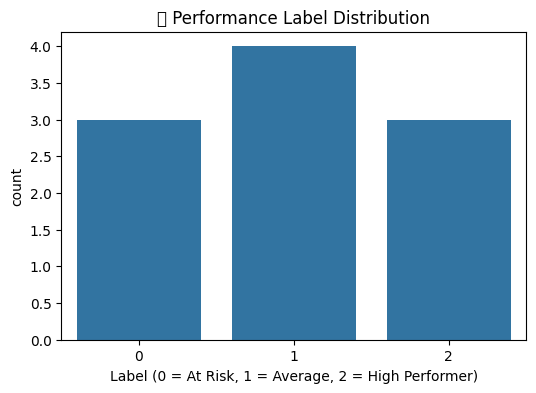

c:\Users\sudha\EIS\eduinsight\venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sudha\EIS\eduinsight\venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sudha\EIS\eduinsight\venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Use


🔹 Logistic Regression
✅ Accuracy: 0.5
📊 Confusion Matrix:
 [[0 1 0]
 [0 0 0]
 [0 0 1]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2


🔹 Random Forest
✅ Accuracy: 0.5
📊 Confusion Matrix:
 [[0 1 0]
 [0 0 0]
 [0 0 1]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



c:\Users\sudha\EIS\eduinsight\venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sudha\EIS\eduinsight\venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sudha\EIS\eduinsight\venv\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Use


🔹 XGBoost
✅ Accuracy: 1.0
📊 Confusion Matrix:
 [[1 0]
 [0 1]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [1]:
# 🔧 Install all required packages
%pip install pandas matplotlib seaborn scikit-learn xgboost

# 📚 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📂 Load dataset
df = pd.read_csv('../data/student_data.csv')
print("✅ Dataset Preview:\n", df.head())

# ❓ Check missing values
print("\n🧹 Missing Values:\n", df.isnull().sum())

# 📊 Describe stats
print("\n📈 Summary Statistics:\n", df.describe())

# 📉 Visualize label distribution
plt.figure(figsize=(6,4))
sns.countplot(x='performance_label', data=df)
plt.title("🎯 Performance Label Distribution")
plt.xlabel("Label (0 = At Risk, 1 = Average, 2 = High Performer)")
plt.show()

# ✂️ Split features & target
X = df.drop(['student_id', 'performance_label'], axis=1)
y = df['performance_label']

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📏 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🤖 Define ML models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# 🧠 Train & Evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    print(f"\n🔹 {name}")
    print("✅ Accuracy:", accuracy_score(y_test, preds))
    print("📊 Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("📋 Classification Report:\n", classification_report(y_test, preds))


In [2]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Train again to be sure (or just use your earlier trained model if available)
best_model = RandomForestClassifier()
best_model.fit(X_train_scaled, y_train)

# Save to ../models directory (make sure it exists)
joblib.dump(best_model, '../models/performance_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

print("✅ Model & Scaler Saved!")


✅ Model & Scaler Saved!
